## LAB 4 - classifiers

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from models import MLClassifier, ParzenClassifer, KNNClassifier
from utils import confusion_matrix, error_score, normalize_data
from visualization import plot_2D

plt.rcParams['figure.figsize'] = [16, 7]

## 2 classes - 2 dimensions 

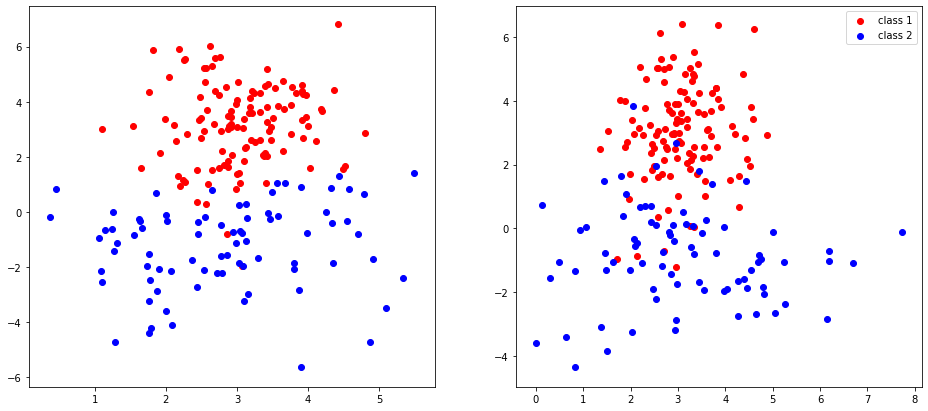

In [16]:
X, Y = np.load('data/lab4.p', allow_pickle=True)
plot_2D(X, Y)

We first convert the data in a canonical data structutre better suited for classification. This allow us to implement [classification models](models.py) which follows the style of scikit-learn's intuitive API, and can be applied to any number of classes and dimensions. For each classification task, we can `fit` the model to the training data, and `predict` the class of unseen samples, even though `fit` and `predict` do different things for each model.

In [3]:
x_train, x_test, y_train, y_test = normalize_data(X, Y)

This implementation design also allow us to check our results directly against sklearn's models, using the following method.

In [4]:
def train_test_evaluate(desc, model):
    global x_train, x_test, y_train, y_test
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    err_train = error_score(y_pred_train, y_train)
    err_test = error_score(y_pred_test, y_test)
    cm_train = confusion_matrix(y_pred_train, y_train)
    cm_test = confusion_matrix(y_pred_test, y_test)
    
    names = ['Reclassification', 'Testing']
    error = [err_train, err_test]
    confusion = [cm_train, cm_test]
    
    print(desc)
    for name, err, cm in zip(names, error, confusion):
        print(f"\t{name}")
        print(f"\t\tP( error ) = {err:.2f}")
        for i, p_correct in enumerate(cm.diagonal()):
            print(f'\t\tP( correct | w_{i+1} ) = {p_correct:.2f} ')

In [5]:
models = {
    "Maximum likelihood" : MLClassifier(),
    "Parzen h1 = 0.1" : ParzenClassifer(h=0.1),
    "Parzen h1 = 5.0" : ParzenClassifer(h=5.0),
    "Nearest neighbours k = 1" : KNNClassifier(k=1),
    "Nearest neighbours k = 5" : KNNClassifier(k=5),
}

for desc, model in models.items():
    train_test_evaluate(desc, model)
    print(50 * '-')

Maximum likelihood
	Reclassification
		P( error ) = 0.05
		P( correct | w_1 ) = 0.97 
		P( correct | w_2 ) = 0.94 
	Testing
		P( error ) = 0.10
		P( correct | w_1 ) = 0.93 
		P( correct | w_2 ) = 0.85 
--------------------------------------------------
Parzen h1 = 0.1
	Reclassification
		P( error ) = 0.00
		P( correct | w_1 ) = 1.00 
		P( correct | w_2 ) = 1.00 
	Testing
		P( error ) = 0.24
		P( correct | w_1 ) = 0.93 
		P( correct | w_2 ) = 0.50 
--------------------------------------------------
Parzen h1 = 5.0
	Reclassification
		P( error ) = 0.03
		P( correct | w_1 ) = 0.96 
		P( correct | w_2 ) = 0.99 
	Testing
		P( error ) = 0.10
		P( correct | w_1 ) = 0.92 
		P( correct | w_2 ) = 0.86 
--------------------------------------------------
Nearest neighbours k = 1
	Reclassification
		P( error ) = 0.00
		P( correct | w_1 ) = 1.00 
		P( correct | w_2 ) = 1.00 
	Testing
		P( error ) = 0.11
		P( correct | w_1 ) = 0.93 
		P( correct | w_2 ) = 0.84 
---------------------------------------

We can check the consistency of our results against scikit-learn models. Sklearn does not implement a Parzen classifier directly, but it  implements a kernel density estimator using Parzen technique. We can convert this estimator into a classifier by comparing the kernel density estimations for all classes. The definition we use for the kernel density estimation is 

\begin{equation*}
p_N = \frac{k_N}{N V_N}
\end{equation*}

where

\begin{align*}
N &= \text{# of samples of dimension $l$} \\
h_N &= \frac{h_1} {\sqrt{N}} \\
V_N &= h_N^l \\
k_N &= \sum_{i=1}^N \varphi(\frac{x-x_i}{h_N}) \\
\end{align*}

and we use a gaussian kernel with $\Sigma = I$, i.e.

\begin{align*}
\varphi(u) = 2\pi^{-\frac{l}{2}} e^{-\frac{1}{2} u^T u}
\end{align*}

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from models import SKLParzenClassifier

sklearn_models = {
    "sklearn ML" : GaussianNB(var_smoothing=0),
    "sklearn Parzen h1 = 0.1" : SKLParzenClassifier(h=0.1),
    "sklearn Parzen h1 = 5.0" : SKLParzenClassifier(h=5.0),
    "sklearn KNN k = 1" : KNeighborsClassifier(n_neighbors=1),
    "sklearn KNN k = 5" : KNeighborsClassifier(n_neighbors=5),
}

for desc, model in sklearn_models.items():
    train_test_evaluate(desc, model)
    print(50 * '-')

sklearn ML
	Reclassification
		P( error ) = 0.05
		P( correct | w_1 ) = 0.97 
		P( correct | w_2 ) = 0.93 
	Testing
		P( error ) = 0.09
		P( correct | w_1 ) = 0.93 
		P( correct | w_2 ) = 0.88 
--------------------------------------------------
sklearn Parzen h1 = 0.1
	Reclassification
		P( error ) = 0.01
		P( correct | w_1 ) = 0.98 
		P( correct | w_2 ) = 1.00 
	Testing
		P( error ) = 0.11
		P( correct | w_1 ) = 0.92 
		P( correct | w_2 ) = 0.84 
--------------------------------------------------
sklearn Parzen h1 = 5.0
	Reclassification
		P( error ) = 0.06
		P( correct | w_1 ) = 0.96 
		P( correct | w_2 ) = 0.91 
	Testing
		P( error ) = 0.09
		P( correct | w_1 ) = 0.93 
		P( correct | w_2 ) = 0.89 
--------------------------------------------------
sklearn KNN k = 1
	Reclassification
		P( error ) = 0.00
		P( correct | w_1 ) = 1.00 
		P( correct | w_2 ) = 1.00 
	Testing
		P( error ) = 0.11
		P( correct | w_1 ) = 0.93 
		P( correct | w_2 ) = 0.84 
--------------------------------------

## 3 classes - 2 dimensions 

In [7]:
X_2D3cl, _, _, _, _, Y_2D3cl, _, _, _, _ = np.load('data/lab4_2.p', allow_pickle=True)
x_train, x_test, y_train, y_test = normalize_data(X_2D3cl, Y_2D3cl)

In [8]:
for desc, model in models.items():
    train_test_evaluate(desc, model)
    print(50 * '-')

Maximum likelihood
	Reclassification
		P( error ) = 0.47
		P( correct | w_1 ) = 0.48 
		P( correct | w_2 ) = 0.76 
		P( correct | w_3 ) = 0.20 
	Testing
		P( error ) = 0.54
		P( correct | w_1 ) = 0.28 
		P( correct | w_2 ) = 0.78 
		P( correct | w_3 ) = 0.07 
--------------------------------------------------
Parzen h1 = 0.1
	Reclassification
		P( error ) = 0.05
		P( correct | w_1 ) = 0.92 
		P( correct | w_2 ) = 0.94 
		P( correct | w_3 ) = 1.00 
	Testing
		P( error ) = 0.65
		P( correct | w_1 ) = 0.52 
		P( correct | w_2 ) = 0.30 
		P( correct | w_3 ) = 0.30 
--------------------------------------------------
Parzen h1 = 5.0
	Reclassification
		P( error ) = 0.40
		P( correct | w_1 ) = 0.88 
		P( correct | w_2 ) = 0.52 
		P( correct | w_3 ) = 0.50 
	Testing
		P( error ) = 0.64
		P( correct | w_1 ) = 0.60 
		P( correct | w_2 ) = 0.28 
		P( correct | w_3 ) = 0.30 
--------------------------------------------------
Nearest neighbours k = 1
	Reclassification
		P( error ) = 0.05
		P( corre

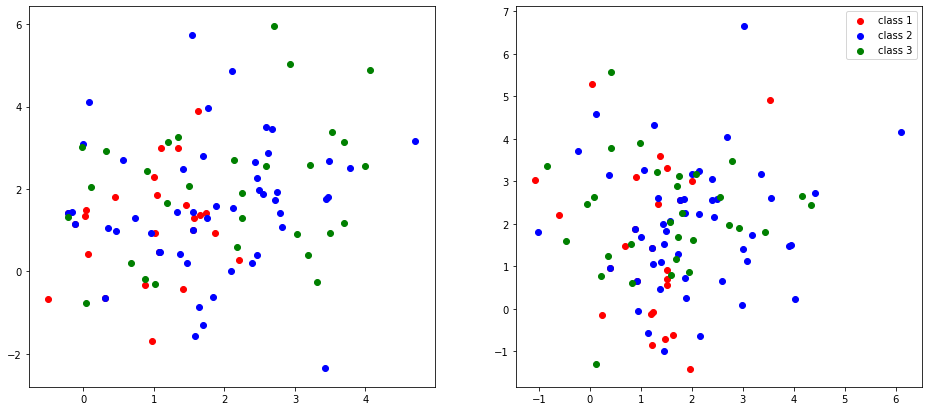

In [9]:
plot_2D(X_2D3cl, Y_2D3cl)

## 4 classes - 2 dimensions - low separability

In [10]:
_, X_2D4cl, _, _, _, _, Y_2D4cl, _, _, _ = np.load('data/lab4_2.p', allow_pickle=True)
x_train, x_test, y_train, y_test = normalize_data(X_2D4cl, Y_2D4cl)

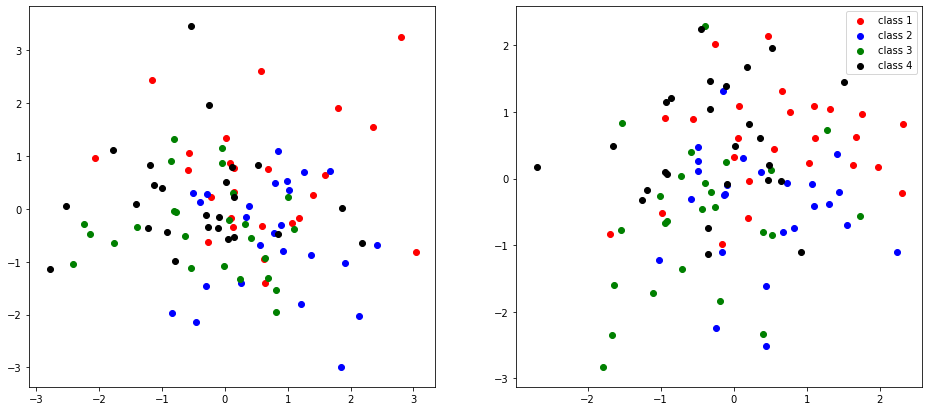

In [11]:
plot_2D(X_2D4cl, Y_2D4cl)

## 4 classes - 2 dimensions - medium separability

In [12]:
_, _, X_2D4cl_ms, _, _, _, _, Y_2D4cl_ms, _, _ = np.load('data/lab4_2.p', allow_pickle=True)
x_train, x_test, y_train, y_test = normalize_data(X_2D4cl_ms, Y_2D4cl_ms)

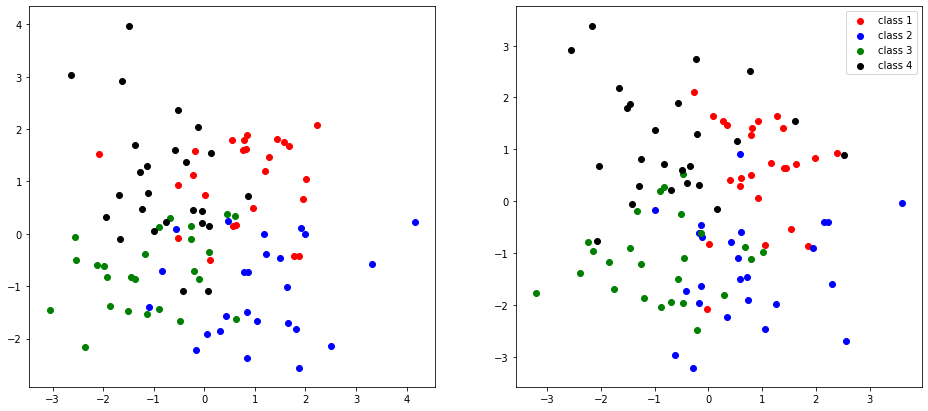

In [13]:
plot_2D(X_2D4cl_ms, Y_2D4cl_ms)

## 4 classes - 2 dimensions - high separability

In [14]:
_, _, _, X_2D4cl_hs, _, _, _, _, Y_2D4cl_hs, _ = np.load('data/lab4_2.p', allow_pickle=True)
x_train, x_test, y_train, y_test = normalize_data(X_2D4cl_hs, Y_2D4cl_hs)

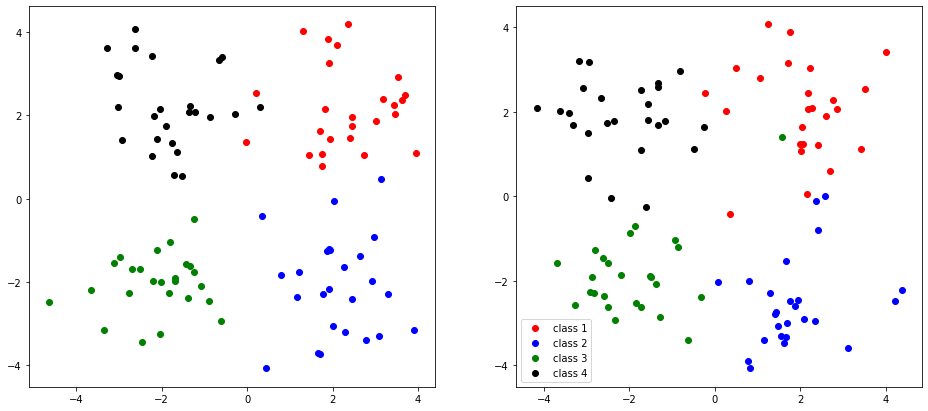

In [15]:
plot_2D(X_2D4cl_hs, Y_2D4cl_hs)